In [37]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [38]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [39]:
corpus = remove_stop_words(corpus)
print(corpus)

['king strong man', 'queen wise woman', 'boy young man', 'girl young woman', 'prince young king', 'princess young queen', 'man strong', 'woman pretty', 'prince boy king', 'princess girl queen']


In [40]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [41]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [42]:
word2int = {}
for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

WINDOW_SIZE = 2

data = []

for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [43]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [44]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [45]:
df.shape

(52, 2)

In [46]:
word2int

{'strong': 0,
 'boy': 1,
 'pretty': 2,
 'queen': 3,
 'young': 4,
 'prince': 5,
 'wise': 6,
 'man': 7,
 'woman': 8,
 'girl': 9,
 'king': 10,
 'princess': 11}

In [54]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)  # 예시를 위해 단어의 개수를 정의합니다.

# 데이터를 원-핫 인코딩 방식으로 변환하는 함수
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

# 가정: `word2int`는 단어를 정수 인덱스로 매핑하는 딕셔너리
X = []  # 입력 데이터
Y = []  # 레이블 데이터

# 예시 데이터
for word_pair in data:  # `data`는 [(word, neighbor), ...] 형태로 가정
    X.append(to_one_hot_encoding(word2int[word_pair[0]]))
    Y.append(to_one_hot_encoding(word2int[word_pair[1]]))

X_train = np.array(X)
Y_train = np.array(Y)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(EMBEDDING_DIM, input_shape=(ONE_HOT_DIM,), activation='linear'),
    tf.keras.layers.Dense(ONE_HOT_DIM, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# 모델 훈련
model.fit(X_train, Y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4742  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 2.4674
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 2.4720
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4636  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 2.4844
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4640  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4672  
Epoch 8/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4699  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.47040
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4665  
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4720  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4727  
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 2.4740
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4725  
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4747 
Epoch 16/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4581  
Epoch 17/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.46596
Epoch 18/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4644  
Epoch 19/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 2.4517
Epoch 20/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4554  
Epoch 21/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4516  
Epoch 22/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4601  
Epoch 23/100

In [55]:
iteration = 20000
for i in range(iteration):
    with tf.GradientTape() as tape:
        predictions = model(X_train, training=True)
        loss = tf.keras.losses.categorical_crossentropy(Y_train, predictions)
    grads = tape.gradient(loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if i % 3000 == 0:
        print('iteration', i, 'loss is:', loss.numpy().mean())

iteration 0 loss is: 2.4233396
iteration 3000 loss is: 1.5950849
iteration 6000 loss is: 1.5948527
iteration 9000 loss is: 1.592197
iteration 12000 loss is: 1.5900508
iteration 15000 loss is: 1.5902755
iteration 18000 loss is: 1.6487285


In [56]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = W1 + b1
print(vectors)

[[ 4.4796178e-01  2.4085832e-01]
 [ 5.4492533e-01  6.4874552e-02]
 [ 9.1327608e-01  7.4661672e-03]
 [-2.3065573e-01 -1.5104935e-02]
 [ 1.8694809e-01  8.0285978e-01]
 [ 1.0544109e+00  2.6983359e-01]
 [ 5.6595951e-01 -3.1990147e-01]
 [ 6.2253451e-01  9.8402925e-02]
 [-7.6496601e-04  3.3087516e-01]
 [ 3.8875738e-01  5.5444553e-02]
 [-3.2958668e-01  5.6437218e-01]
 [ 6.2365264e-01 -3.8706267e-01]]


In [57]:
words_list = list(words)

# DataFrame 생성
w2v_df = pd.DataFrame(vectors, columns=['x1', 'x2'])
w2v_df['word'] = words_list  # 리스트로 변환된 words 사용
w2v_df = w2v_df[['word', 'x1', 'x2']]  # 열 순서 조정
w2v_df

,word,x1,x2
0,strong,0.447962,0.240858
1,boy,0.544925,0.064875
2,pretty,0.913276,0.007466
3,queen,-0.230656,-0.015105
4,young,0.186948,0.802860
5,prince,1.054411,0.269834
6,wise,0.565960,-0.319901
7,man,0.622535,0.098403
8,woman,-0.000765,0.330875
9,girl,0.388757,0.055445


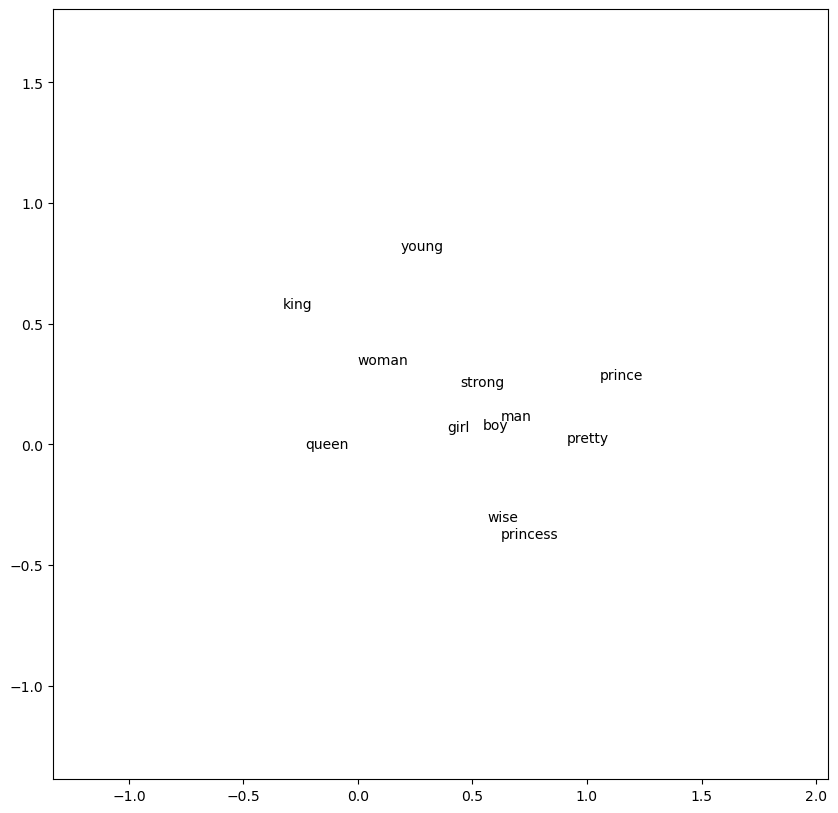

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()